# Differentation of Blackbox Combinatorial Solvers Datasets

Here we provide easy inspection of the datasets used in the paper.


## Utility Functions

In [3]:
# helper functions, you need to install tqdm for progress bar feature
import urllib.request
import numpy as np
from matplotlib import pyplot as plt

# try:

#     from tqdm import tqdm
#     class DownloadProgressBatspr(tqdm):
#         def update_to(self, b=1, bsize=1, tsize=None):
#             if tsize is not None:
#                 self.total = tsize
#             self.update(b * bsize - self.n)


#     def download_url(url, output_path):
#         with DownloadProgressBar(unit='B', unit_scale=True,
#                                 miniters=1, desc=url.split('/')[-1]) as t:
#             urllib.request.urlretrieve(url, filename=output_path, reporthook=t.update_to)
# except ModuleNotFoundError as e:
#     def download_url(url, output_path):
#         urllib.request.urlretrieve(url, filename=output_path)


# Warcraft Shortest Path

Downloading the dataset

In [30]:
import tarfile
import urllib.request

os.makedirs("datasets", exist_ok=True)
warcraft_url = "https://edmond.mpdl.mpg.de/imeji/exportServlet?format=file&id=http://edmond.mpdl.mpg.de/imeji/item/PPjoEvUh9_PVTPSD"
data_path = "datasets/warcraft.tar.gz"
if not os.path.exists(data_path):
    print("Downloading dataset...")
    download_url(warcraft_url, data_path)

print(f"Extracting {data_path} ...")
f = tarfile.open(data_path, "r:gz")
f.extractall(path="datasets")
f.close()
print("Extracted")



Extracting datasets/warcraft.tar.gz ...
Extracted


For the Warcraft Sortest Path dataset we have randomly genrated maps of different sizes with optimal shortest path from the top left vertex to the bottom right vertex. Each type of tile has a different cost, we also supply the costs used to generate the optimal shortest paths.

Train images shape:  (10000, 96, 96, 3)
Train labels shape:  (10000, 12, 12)
Weights shape: (10000, 12, 12)
label value:  [[1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]]


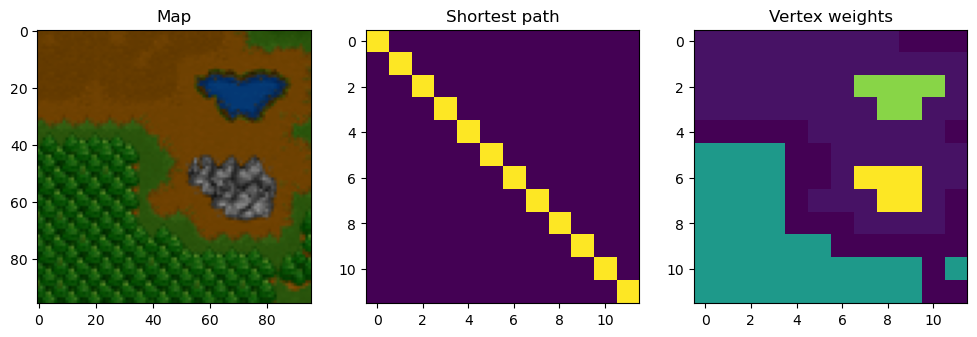

In [15]:
import os
import urllib.request
import numpy as np
from matplotlib import pyplot as plt

data_dir = './data/warcraft_shortest_path_oneskin/12x12/'

data_suffix = "maps"
train_prefix = "train"


train_inputs = np.load(os.path.join(data_dir, train_prefix + "_" + data_suffix + ".npy"))
train_weights = np.load(os.path.join(data_dir, train_prefix + "_vertex_weights.npy"))
train_labels = np.load(os.path.join(data_dir, train_prefix + "_shortest_paths.npy"))

#images = train_inputs.transpose(0,2,3,1).astype(np.uint8)
images = train_inputs

print("Train images shape: ", train_inputs.shape)
print("Train labels shape: ",  train_labels.shape)
print("Weights shape:", train_weights.shape)

idx = 10
im = images[idx]
label = train_labels[idx]
weights = train_weights[idx]
print("label value: ", label)

fig, ax = plt.subplots(1,3, figsize=(12,12))

ax[0].imshow(im.astype(np.uint8))
ax[0].set_title("Map")
ax[1].imshow(label)
ax[1].set_title("Shortest path")
ax[2].set_title("Vertex weights")
ax[2].imshow(weights.astype(np.float32))

fig.savefig("warcraft_example.png", dpi=600, transparent=True, bbox_inches='tight')

# MNIST Min-cost Perfect Matching

Downloading the dataset

In [ ]:
import tarfileimport tarfile
import urllib.request

os.makedirs("datasets", exist_ok=True)
mnist_matching_url = "https://edmond.mpdl.mpg.de/imeji/exportServlet?format=file&id=http://edmond.mpdl.mpg.de/imeji/item/HrfrAxcoQ049qk4K"
data_path = "datasets/perfect_matching.tar.gz"
if not os.path.exists(data_path):
    print("Downloading dataset...")
    download_url(mnist_matching_url, data_path)

print(f"Extracting {data_path}")
f = tarfile.open(data_path, "r:gz")
f.extractall(path="datasets")
f.close()
print("Extracted")

import urllib.request

os.makedirs("datasets", exist_ok=True)
mnist_matching_url = "https://edmond.mpdl.mpg.de/imeji/exportServlet?format=file&id=http://edmond.mpdl.mpg.de/imeji/item/HrfrAxcoQ049qk4K"
data_path = "datasets/perfect_matching.tar.gz"
if not os.path.exists(data_path):
    print("Downloading dataset...")
    download_url(mnist_matching_url, data_path)

print(f"Extracting {data_path}")
f = tarfile.open(data_path, "r:gz")
f.extractall(path="datasets")
f.close()
print("Extracted")


In [21]:
import itertools
import functools
from PIL import Image, ImageDraw


def neighbours_8(x, y, x_max, y_max):
    deltas_x = (-1, 0, 1)
    deltas_y = (-1, 0, 1)
    for (dx, dy) in itertools.product(deltas_x, deltas_y):
        x_new, y_new = x + dx, y + dy
        if 0 <= x_new < x_max and 0 <= y_new < y_max and (dx, dy) != (0, 0):
            yield x_new, y_new


def neighbours_4(x, y, x_max, y_max):
    for (dx, dy) in [(1, 0), (0, 1), (0, -1), (-1, 0)]:
        x_new, y_new = x + dx, y + dy
        if 0 <= x_new < x_max and 0 <= y_new < y_max and (dx, dy) != (0, 0):
            yield x_new, y_new


def get_neighbourhood_func(neighbourhood_fn):
    if neighbourhood_fn == "4-grid":
        return neighbours_4
    elif neighbourhood_fn == "8-grid":
        return neighbours_8
    else:
        raise Exception(f"neighbourhood_fn of {neighbourhood_fn} not possible")


def edges_from_vertex(x, y, N, neighbourhood_fn):
    v = (x, y)
    neighbours = get_neighbourhood_func(neighbourhood_fn)(*v, x_max=N, y_max=N)
    v_edges = [
        (*v, *vn) for vn in neighbours if vertex_index(v, N) < vertex_index(vn, N)
    ]  # Enforce ordering on vertices
    return v_edges


def vertex_index(v, dim):
    x, y = v
    return x * dim + y


@functools.lru_cache(32)
def edges_from_grid(N, neighbourhood_fn):
    all_vertices = itertools.product(range(N), range(N))
    all_edges = [edges_from_vertex(x, y, N, neighbourhood_fn=neighbourhood_fn) for x, y in all_vertices]
    all_edges_flat = sum(all_edges, [])
    all_edges_flat_unique = list(set(all_edges_flat))
    return np.asarray(all_edges_flat_unique)


def perfect_matching_vis(grid_img, grid_dim, labels, color=(0,255,255), width=2, offset=0, edges_list=None):

    edges = edges_list if not None else edges_from_grid(grid_dim, neighbourhood_fn='4-grid')

    pixels_per_cell = int(grid_img.shape[0]/grid_dim)
        
    img = Image.fromarray(np.uint8(grid_img.squeeze())).convert("RGB")
    for i, (y1,x1, y2, x2) in enumerate(edges):
        if labels[i]:
            draw = ImageDraw.Draw(img)
            if x1 == x2:
                draw.line((x1*pixels_per_cell + pixels_per_cell/2 , y1*pixels_per_cell + pixels_per_cell/2 + offset,
                x2*pixels_per_cell + pixels_per_cell/2, y2*pixels_per_cell + pixels_per_cell/2 - offset), fill=color,width=width)
            else:
                draw.line((x1*pixels_per_cell + pixels_per_cell/2 + offset, y1*pixels_per_cell + pixels_per_cell/2,
                x2*pixels_per_cell + pixels_per_cell/2 - offset, y2*pixels_per_cell + pixels_per_cell/2), fill=color,width=width)
            del draw

    return np.asarray(img, dtype=np.uint8)



# data_dir = './data/mnist_matching_grayscale/12x12_mnist_nonunique'

# train_prefix = "train"
# data_suffix = "full_images"
# train_inputs = np.load(os.path.join(data_dir, train_prefix + "_" + data_suffix + ".npy"))
# train_labels = np.load(os.path.join(data_dir, train_prefix + "_perfect_matching.npy"))

# images = train_inputs.transpose(0,2,3,1).astype(np.uint8)


# img_idx = 2

# plt.title("Example training data point")
# plt.imshow(images[img_idx], cmap="gray")


The labels for each datapoint are vectors inidicating each edge that was used in the perfect matching by 0-1 entries. In order to convert this to grid coordinates, the function `edges_from_grid` is useful returning the set of edges as tuples of grid coordinates (y1,x1, y2, x2). The label vector indicates which edges are in the matching from this set, example usage for a grid of dimension 4:

```python
edges = edges_from_grid(4, neighbourhood_fn='4-grid')

```

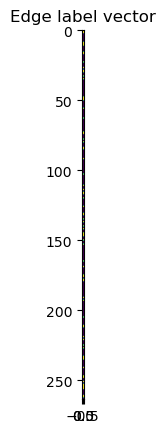

In [5]:
plt.title("Edge label vector")
plt.imshow(train_labels[img_idx][..., None])

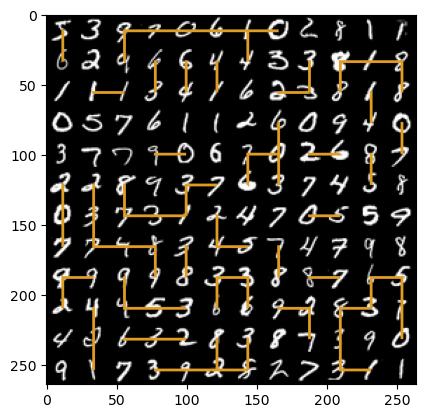

In [6]:
labeled_image = perfect_matching_vis(images[img_idx], 12, train_labels[img_idx], color="#e19c24", width=2)
plt.imshow(labeled_image)

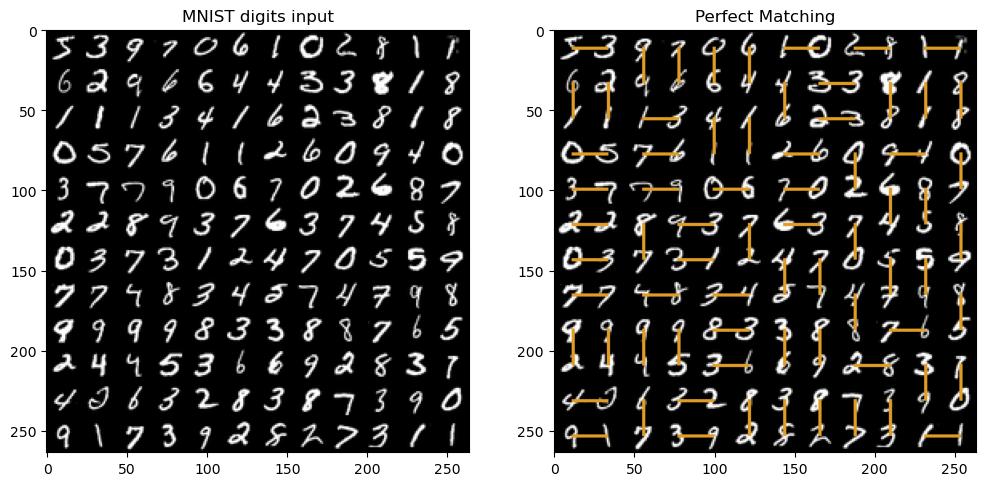

In [16]:
import itertools
import functools
from PIL import Image, ImageDraw

def perfect_matching_vis_2(grid_img, grid_dim, labels, color=(0,255,255), width=2, offset=0, edges_list=None):
    edges = edges_list 

    pixels_per_cell = int(grid_img.shape[0]/grid_dim)
        
    img = Image.fromarray(np.uint8(grid_img.squeeze())).convert("RGB")
    # print(labels)
    # exit(0)
    for i, (u, v) in enumerate(edges):
        y1, x1, y2, x2 = u%grid_dim, u//grid_dim, v%grid_dim, v//grid_dim
        if labels[i]>0.5:
            draw = ImageDraw.Draw(img)
            if x1 == x2:
                draw.line((x1*pixels_per_cell + pixels_per_cell/2 , y1*pixels_per_cell + pixels_per_cell/2 + offset,
                x2*pixels_per_cell + pixels_per_cell/2, y2*pixels_per_cell + pixels_per_cell/2 - offset), fill=color,width=width)
            else:
                draw.line((x1*pixels_per_cell + pixels_per_cell/2 + offset, y1*pixels_per_cell + pixels_per_cell/2,
                x2*pixels_per_cell + pixels_per_cell/2 - offset, y2*pixels_per_cell + pixels_per_cell/2), fill=color,width=width)
            del draw

    return np.asarray(img, dtype=np.uint8)
import pickle
path = './data/mnist_matching_grayscale/12x12_mnist_nonunique/pm_12_mini_10.pkl'
with open(path, 'rb') as file:
    data = pickle.load(file)

train_inputs = data['train']['z']
train_labels = data['train']['sol']
edges_list = data['edges_list']
images = train_inputs.transpose(0,2,3,1).astype(np.uint8)


img_idx = 2

# plt.title("Example training data point")
# plt.imshow(images[img_idx], cmap="gray")
labeled_image = perfect_matching_vis_2(images[img_idx], 12, train_labels[img_idx], color="#e19c24", width=2, edges_list=edges_list)
# plt.imshow(labeled_image)

fig, ax = plt.subplots(1,2, figsize=(12,12))

ax[0].imshow(images[img_idx], cmap="gray")
ax[0].set_title("MNIST digits input")
ax[1].imshow(labeled_image)
ax[1].set_title("Perfect Matching")
# ax[2].set_title("Vertex weights")
# ax[2].imshow(weights.astype(np.float32))
fig.savefig("mnist_matching_example.png", dpi=600, transparent=True, bbox_inches='tight')

# Country Capitals Travelling Salesman Problem

Downloading the dataset

In [1]:
import tarfile
import urllib.request

os.makedirs("datasets/globe_tsp", exist_ok=True)
globe_tsp_url = "https://edmond.mpdl.mpg.de/imeji/exportServlet?format=file&id=http://edmond.mpdl.mpg.de/imeji/item/70niNNMFUsmfEyfm"
data_path = "datasets/globe_tsp.tar.gz"
if not os.path.exists(data_path):
    print("Downloading dataset...")
    download_url(globe_tsp_url, data_path)

print(f"Extracting {data_path} ...")
f = tarfile.open(data_path, "r:gz")
f.extractall(path="datasets/globe_tsp")
f.close()
print("Extracted")


Extracting datasets/globe_tsp.tar.gz
Extracted


We've generated random subsets of country capitals from 100 countries. The training dataset contains 10000 instances, each consisting of 10 images of flags as the input and the optimal TSP tour of the corresponding capitals as the label. For each instance it also contains the ground truth distance matrix of the capitals that generate the optimal TSP tour, but the ground truth distance matrix is not used for training.

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline

def display_places(gps, flags, filename=None):
    plt.figure(figsize=(18,9))
    m = Basemap(projection='ortho',lon_0=20.0,lat_0=20.0, resolution=None)
    
    #m = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=75,\
    #        llcrnrlon=-120,urcrnrlon=180,lat_ts=20,resolution='c', fix_aspect=False)
    m.shadedrelief()    

    for (lon, lat), flag in zip(gps, flags):
        x, y = m(lon, lat)        
        im = OffsetImage(flag[..., ::-1], zoom=0.8)
        ab = AnnotationBbox(im, (x,y), xycoords='data', frameon=False)
        m._check_ax().add_artist(ab)

    plt.title("Country locations")
    plt.show()

    
def plot_tsp_path(gps, flags, path_indices):
    
    plt.figure(figsize=(24,12))
    m = Basemap(projection='ortho',lon_0=-10.0,lat_0=40.0, resolution=None)
    m.shadedrelief()    

    for (lon, lat), flag in zip(gps, flags):
        x, y = m(lon, lat)        
        im = OffsetImage(flag[..., ::-1], zoom=0.8)
        ab = AnnotationBbox(im, (x,y), xycoords='data', frameon=False)
        m._check_ax().add_artist(ab)

    lat = [gps[i][1] for i in path_indices]
    lon = [gps[i][0] for i in path_indices]     
    
    x, y = m(lon, lat)
    m.plot(x, y, 'o-', markersize=5, linewidth=3) 

    plt.title("Country locations with TSP solution")
    plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

The dataset

In [ ]:
data_dir = './datasets/globe_tsp/10_countries_from_100/'

train_prefix = "train"


country_names, gps, flags = zip(*np.load(os.path.join(data_dir, "countries.npy")))
flag_indices = np.load(os.path.join(data_dir, train_prefix + "_indices.npy"))
distance_matrices = np.load(os.path.join(data_dir, train_prefix + "_distance_matrices.npy"))
tsp_tours = np.load(os.path.join(data_dir, train_prefix + "_tsp_tours.npy"))

print("Flags shape: ", np.array(flags).shape)
print("Gps shape: ", np.array(gps).shape)
print("Flag indices shape: ", np.array(flag_indices).shape)
print("Distance matrices shape: ", distance_matrices.shape)
print("TSP tours / labels shape: ",  tsp_tours.shape)




Examples of individual flags and training instances

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12,12))

# We have a set of 100 flags with gps data
flag_idx = 57
example_flag = flags[flag_idx]
example_flag_gps = gps[flag_idx]
example_flag_name = country_names[flag_idx]
ax[0].imshow(example_flag.astype(np.uint8))
ax[0].set_title(f"One of 10 flags in input of instance:\n {example_flag_name} at GPS: {example_flag_gps}")

# Each instance consists of 10 images of flags as the input and the optimal tsp tour 
# of the corresponding capitals as the label
idx = 10
label = tsp_tours[idx]
distances = distance_matrices[idx]
flags_indices_in_instance = flag_indices[idx]

ax[1].set_title("Example TSP tour label")
ax[1].imshow(label)
ax[2].set_title("Ground truth Distance Matrix for instance \n (not used for training)")
ax[2].imshow(distances.astype(np.float32))


Visualization of the captial locations

In [ ]:
flags_in_instance = np.array(flags)[flags_indices_in_instance]
gps_in_instance = np.array(gps)[flags_indices_in_instance]

try:  # plot with optimal tsp tour
    import comb_modules.tsp as tsp
    path_len, matrix, path = tsp.solve_tsp(distance_matrices[idx])
    plot_tsp_path(gps_in_instance, flags_in_instance, path)
except:  # only plot country locations
    display_places(gps_in_instance, flags_in_instance)
